In [1]:
import numpy as np
import pandas as pd

#import visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

#import sklearn libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

In [2]:
## Remove warnings
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Load the data sets

df = pd.read_csv("diabetes.csv")
pd.set_option('display.max_columns',None)
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
df.tail()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


In [5]:
# checking shape of dataset
df.shape

(768, 9)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [7]:
# checking missing values

df.isnull().mean()*100

Pregnancies                 0.0
Glucose                     0.0
BloodPressure               0.0
SkinThickness               0.0
Insulin                     0.0
BMI                         0.0
DiabetesPedigreeFunction    0.0
Age                         0.0
Outcome                     0.0
dtype: float64

In [8]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [9]:
df.describe()  # checking summary of dataset

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [10]:
# calculating probability
df['Outcome'].value_counts()/len(df)*100

Outcome
0    65.104167
1    34.895833
Name: count, dtype: float64

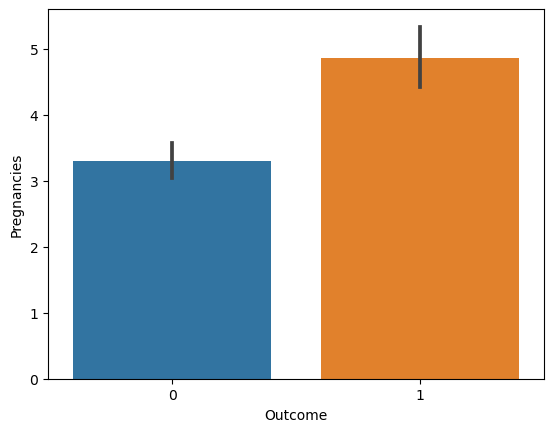

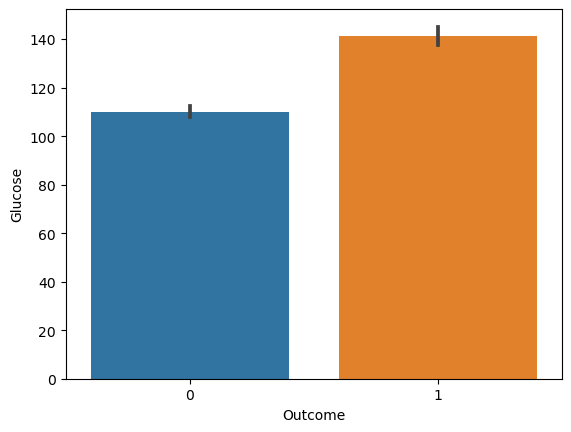

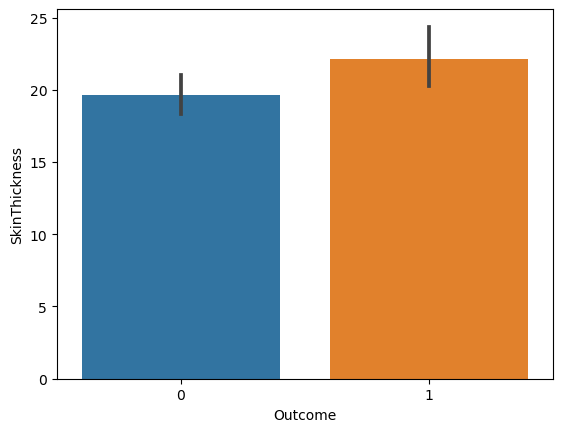

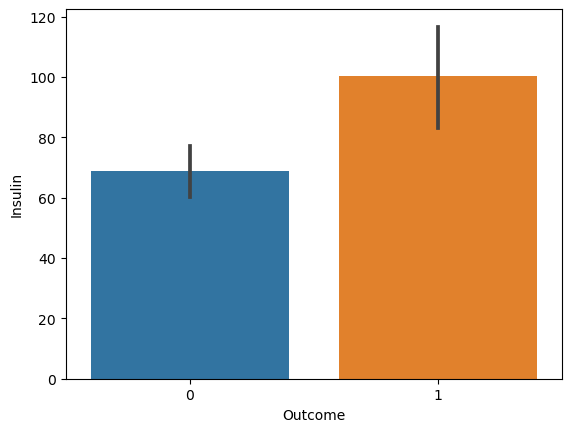

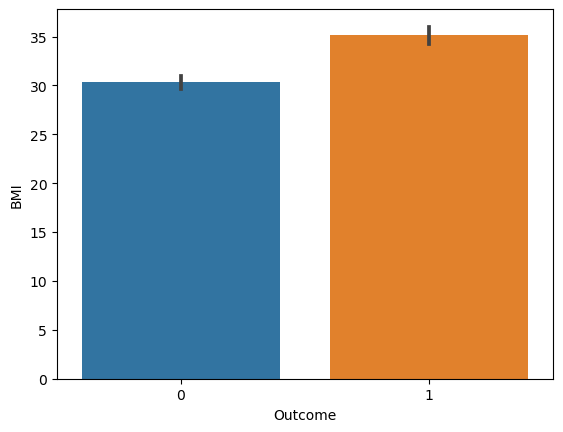

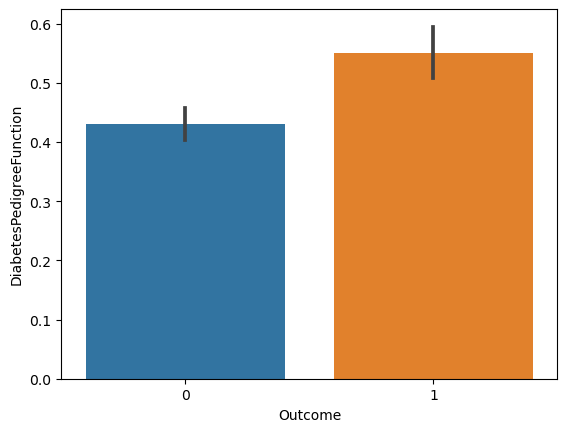

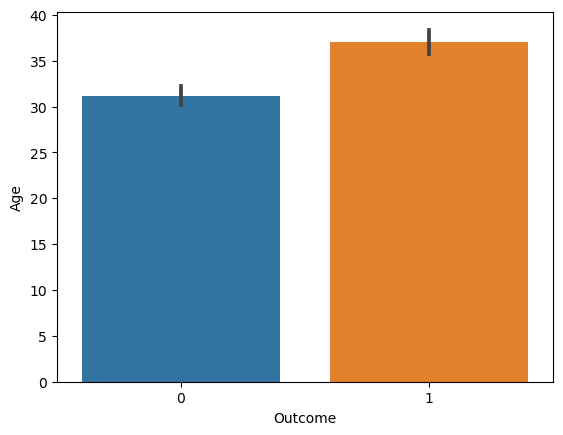

In [11]:
# EDA
plt.figure()
sns.barplot(x='Outcome',y='Pregnancies',data=df)
plt.show()
plt.figure()
sns.barplot(x='Outcome' , y='Glucose' , data=df)
plt.show()
plt.figure()
sns.barplot(x='Outcome', y='SkinThickness' , data=df)
plt.show()
plt.figure()
sns.barplot(x='Outcome', y='Insulin' , data=df)
plt.show()
plt.figure()
sns.barplot(x='Outcome', y='BMI' , data=df)
plt.show()
plt.figure()
sns.barplot(x='Outcome', y='DiabetesPedigreeFunction' , data=df)
plt.figure()
sns.barplot(x='Outcome', y='Age' , data=df)
plt.show()

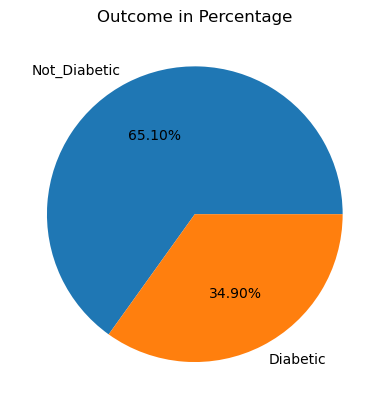

In [12]:
plt.title('Outcome in Percentage')
plt.pie(df['Outcome'].value_counts(),labels=['Not_Diabetic','Diabetic'],autopct='%1.2f%%')
plt.show()

<Axes: >

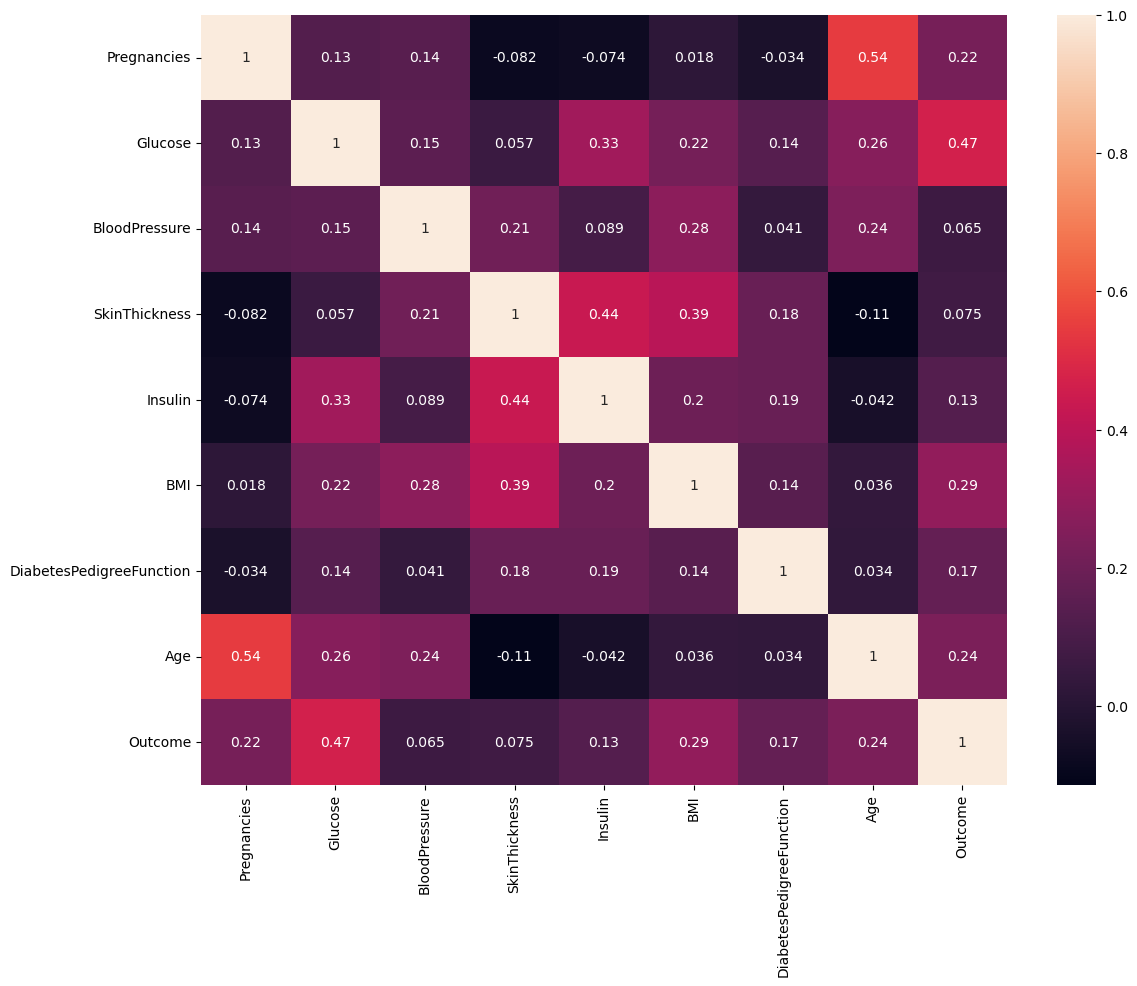

In [13]:
plt.figure(figsize=(13,10))
sns.heatmap(df.corr(),annot=True)

In [14]:
# Data preprocessing
 # Replacing Nan with mean values
df["Glucose"].fillna(df["Glucose"].mean(), inplace = True)
df["BloodPressure"].fillna(df["BloodPressure"].mean(), inplace = True)
df["SkinThickness"].fillna(df["SkinThickness"].mean(), inplace = True)
df["Insulin"].fillna(df["Insulin"].mean(), inplace = True)
df["BMI"].fillna(df["BMI"].mean(), inplace = True)
df["Pregnancies"].fillna(df["Pregnancies"].mean(), inplace = True)
df["DiabetesPedigreeFunction"].fillna(df["DiabetesPedigreeFunction"].mean(), inplace = True)

In [15]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


### Prediction using Logistic Regression

In [16]:
#Splitting Data
X = df.drop(columns='Outcome',axis=1)
Y = df['Outcome']

In [17]:
#Splitting the data
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,stratify=Y,random_state=2)
print(X.shape)
print(X_train.shape)
print(X_test.shape)


(768, 8)
(614, 8)
(154, 8)


In [18]:
model = LogisticRegression()
model.fit(X_train, Y_train)
y_predict = model.predict(X_test)

In [19]:
y_predict

array([0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1],
      dtype=int64)

In [20]:
#confusion matrix
from sklearn.metrics import confusion_matrix
confusion_matrix(y_predict,Y_test)

array([[88, 26],
       [12, 28]], dtype=int64)

In [21]:
from sklearn.metrics import accuracy_score ,classification_report,f1_score

In [22]:
Accuracy=accuracy_score(Y_test,y_predict)
print("Accuracy Score of test data : ",Accuracy)

Accuracy Score of test data :  0.7532467532467533


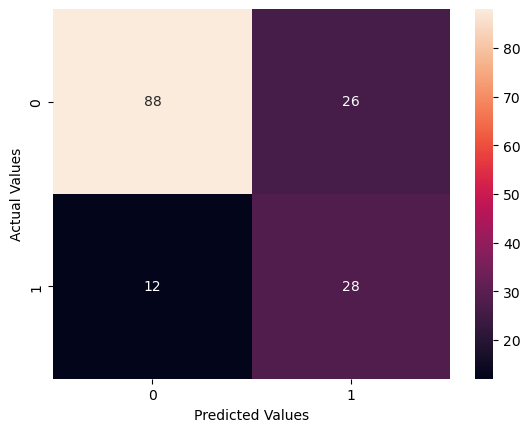

In [23]:
#Evaluating model
cf_matrix = confusion_matrix(y_predict,Y_test)
sns.heatmap(cf_matrix,annot=True,fmt=".0f")
plt.xlabel("Predicted Values")
plt.ylabel("Actual Values")
plt.show()

In [24]:
print(classification_report(Y_test,y_predict))


              precision    recall  f1-score   support

           0       0.77      0.88      0.82       100
           1       0.70      0.52      0.60        54

    accuracy                           0.75       154
   macro avg       0.74      0.70      0.71       154
weighted avg       0.75      0.75      0.74       154



In [25]:
#Model Testing

y_predict = model.predict([[4,130,65,30,90,33.6,0.627,50]])
print(y_predict)
if y_predict==1:
    print("You are Diabetic")
else:
    print("You are not Diabetic")

[1]
You are Diabetic


In [26]:
#Model Testing

y_predict = model.predict([[4,110,40,20,150,30.6,0.527,30]])
print(y_predict)
if y_predict==1:
    print("You are Diabetic")
else:
    print("You are not Diabetic")

[0]
You are not Diabetic


### Prediction Random Forest Classifier

In [27]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()

In [28]:
rf.fit(X_train,Y_train)

RandomForestClassifier()

In [29]:
Y_pred1 = rf.predict(X_test)
Y_pred1

array([0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0],
      dtype=int64)

In [30]:
confusion_matrix(Y_pred1,Y_test)

array([[87, 25],
       [13, 29]], dtype=int64)

In [31]:
accuracy=accuracy_score(Y_test,Y_pred1)
print("Accuracy Score of test data : ",accuracy)

Accuracy Score of test data :  0.7532467532467533


In [32]:
print(classification_report(Y_test,Y_pred1))

              precision    recall  f1-score   support

           0       0.78      0.87      0.82       100
           1       0.69      0.54      0.60        54

    accuracy                           0.75       154
   macro avg       0.73      0.70      0.71       154
weighted avg       0.75      0.75      0.74       154



In [33]:
predict1 = rf.predict([[4,110,40,20,150,30.6,0.527,30]])
print(predict1)
if predict1==1:
    print("You are Diabetic")
else:
    print("You are not Diabetic")

[0]
You are not Diabetic


###### Thank You